In [ ]:
import json
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix
import matplotlib.pyplot as plt

print("Script started")

# Load MegaDetector output JSON file
with open('megadetector_output.json') as f:
    data = json.load(f)

print("Data loaded type:", type(data))

image_data = data.get("images", [])

print("image_data type:", type(image_data))
if isinstance(image_data, list) and len(image_data) > 0:
    print("First item in image_data type:", type(image_data[0]))

confidence_threshold = 0.5

y_true = []  # True labels: 1 for non-blank, 0 for blank
y_pred = []  # Predicted labels: 1 for non-blank, 0 for blank
confidence_scores = []

# Process each image in the JSON data
for image in image_data:
    if not isinstance(image, dict):
        print(f"Unexpected data type for image: {type(image)}")
        continue

    file_name = image.get("file")
    detections = image.get("detections", [])

    max_conf = max([det.get('conf', 0) for det in detections], default=0)
    confidence_scores.append(max_conf)

    if max_conf >= confidence_threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)

    if 'empty' in file_name.lower():
        y_true.append(0)
    else:
        y_true.append(1)

# Calculate evaluation metrics
f1 = f1_score(y_true, y_pred)
precision, recall, _ = precision_recall_curve(y_true, confidence_scores)

print(f"Best F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

misclassified_indices = [i for i, (yt, yp) in enumerate(zip(y_true, y_pred)) if yt != yp]
print("Examples of misclassified images:")
for idx in misclassified_indices[:5]:  # Show first 5 misclassifications
    print(f"Image: {image_data[idx]['file']} - True Label: {y_true[idx]}, Predicted: {y_pred[idx]}")


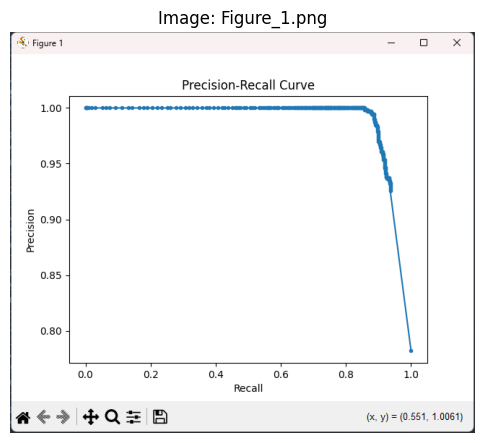

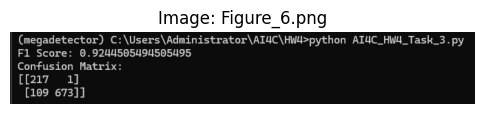

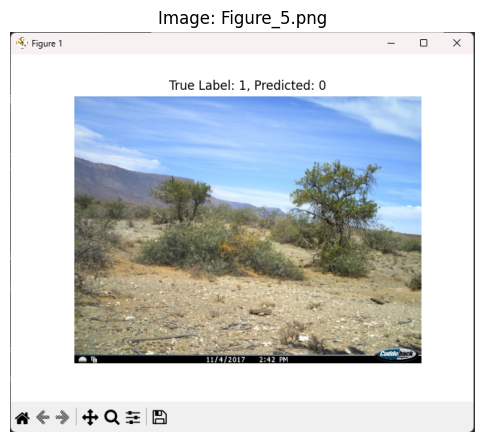

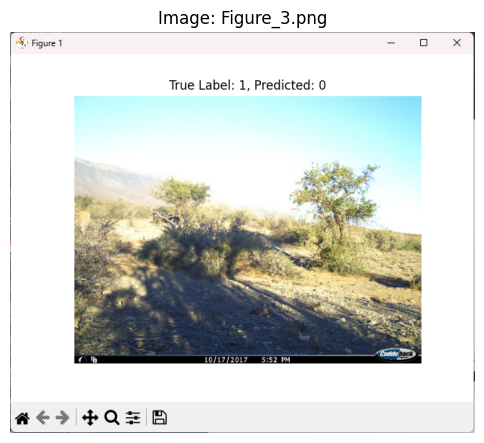

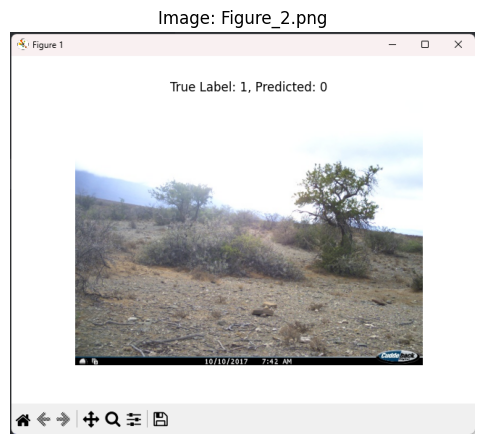

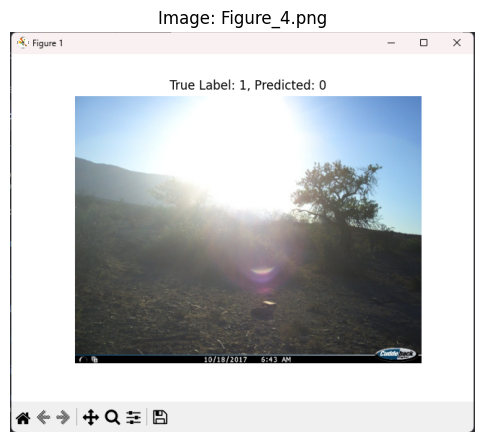

In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image

images_dir = '/content/'

image_files = [f for f in os.listdir(images_dir) if f.endswith(('.png'))]

for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    img = Image.open(image_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {image_file}")
    plt.show()
